In [39]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the data from the CSV files
filepaths = ['label_smoothing_0.csv',
             'label_smoothing_1.csv',
             'label_smoothing_2.csv']

# Read the CSV files into DataFrames
reports = [pd.read_csv(f'label_smoothing_{i}.csv') for i in range(3)]

# Set the style of seaborn and matplotlib
sns.set_style("whitegrid")

In [40]:
# Define a function to plot the experiment metrics
def plot_experiment_metrics(filepaths, experiment_type, title=None):
    plt.figure(figsize=(14, 5))

    # Loop through each CSV file
    for filepath in filepaths:
        # Read the data
        data = pd.read_csv(filepath)
        # Filter the data for the specific experiment type
        exp_data = data[data['Experiment Type'] == experiment_type]

        # Check if the filtered data is empty
        if exp_data.empty:
            print(f"No data found for {experiment_type} in {filepath}.")
            continue

        # Extract the label smoothing value from the file name for the legend
        label_smoothing_value = filepath.split('_')[-1].split('.')[0]

        # Plot the training accuracy
        plt.subplot(1, 2, 1)
        plt.plot(exp_data['Epoch'], exp_data['Train Accuracy'], label=f'Train Acc LS 0.{label_smoothing_value}')
        plt.plot(exp_data['Epoch'], exp_data['Valid Accuracy'], '--', label=f'Valid Acc LS 0.{label_smoothing_value}')

        # Plot the training loss
        plt.subplot(1, 2, 2)
        plt.plot(exp_data['Epoch'], exp_data['Train Loss'], label=f'Train Loss LS 0.{label_smoothing_value}')
        plt.plot(exp_data['Epoch'], exp_data['Valid Loss'], '--', label=f'Valid Loss LS 0.{label_smoothing_value}')

    # Set the plot titles and labels
    plt.subplot(1, 2, 1)
    plt.title('Accuracy per Epoch' if title is None else f'Accuracy per Epoch - {title}')
    plt.xlabel('Epoch')
    plt.ylabel('Accuracy')
    plt.legend()

    plt.subplot(1, 2, 2)
    plt.title('Loss per Epoch' if title is None else f'Loss per Epoch - {title}')
    plt.xlabel('Epoch')
    plt.ylabel('Loss')
    plt.legend()

    plt.tight_layout()

    # Save the plot to a placeholder path; change this to a real path when running the code
    plt.savefig(f'Plot/{experiment_type}.png')

    # Show plot
    plt.show()

In [41]:
# Function to plot accuracy and loss for each experience separately for a given experiment type
def plot_metrics_for_experiment_type_separately(report_list, experiment_type):
    """
    This function plots the accuracy and loss for each experience separately for a given experiment type.

    Parameters:
    - reports (list of DataFrame): A list containing the pandas DataFrames of reports.
    - experiment_type (str): The type of experiment to plot.
    """
    # Determine global min and max for setting y-axis scales
    acc_min, acc_max, loss_min, loss_max = (100, 0, float('inf'), 0)
    for report in report_list:
        df = report[report['Experiment Type'] == experiment_type]
        acc_min = min(acc_min, df['Train Accuracy'].min(), df['Valid Accuracy'].min())
        acc_max = max(acc_max, df['Train Accuracy'].max(), df['Valid Accuracy'].max())
        loss_min = min(loss_min, df['Train Loss'].min(), df['Valid Loss'].min())
        loss_max = max(loss_max, df['Train Loss'].max(), df['Valid Loss'].max())

    # Iterate through the experiences and plot them
    for idx, report in enumerate(report_list):
        # Filter the DataFrame for the given experiment type
        df = report[report['Experiment Type'] == experiment_type]

        # Plot settings
        fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14, 5))
        fig.suptitle(f'Experience Label Smoothing 0.{idx} - {experiment_type}')

        # Accuracy plot
        ax1.plot(df['Epoch'], df['Train Accuracy'], label='Train Accuracy')
        ax1.plot(df['Epoch'], df['Valid Accuracy'], label='Validation Accuracy', linestyle='--')
        ax1.set_title('Accuracy over Epochs')
        ax1.set_xlabel('Epochs')
        ax1.set_ylabel('Accuracy')
        ax1.legend()
        ax1.grid(True)
        ax1.set_ylim([acc_min - 5, acc_max + 5])  # Set y-axis limits

        # Loss plot
        ax2.plot(df['Epoch'], df['Train Loss'], label='Train Loss')
        ax2.plot(df['Epoch'], df['Valid Loss'], label='Validation Loss', linestyle='--')
        ax2.set_title('Loss over Epochs')
        ax2.set_xlabel('Epochs')
        ax2.set_ylabel('Loss')
        ax2.legend()
        ax2.grid(True)
        ax2.set_ylim([loss_min - 0.05, loss_max + 0.05])  # Set y-axis limits

        # Show the plot
        plt.show()

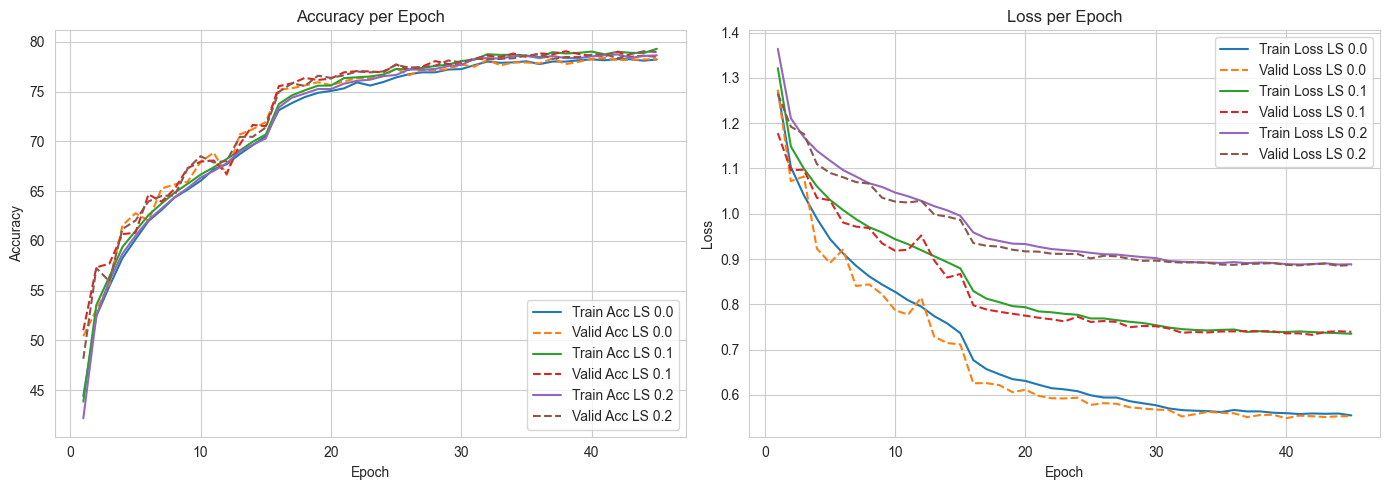

In [42]:
# Plot experiment type name and re-run the plotting function
plot_experiment_metrics(filepaths, 'Self-Supervise Rotation Model')

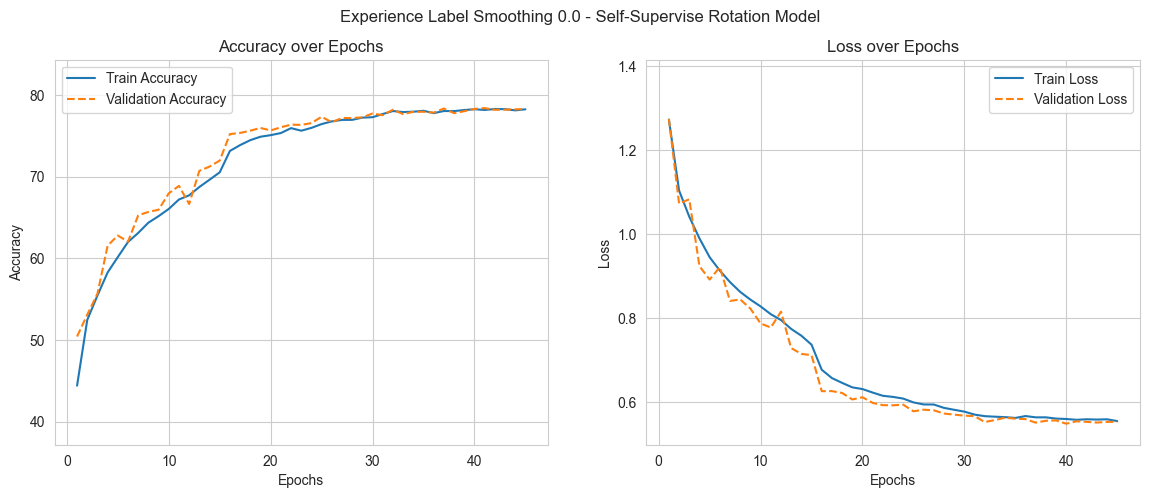

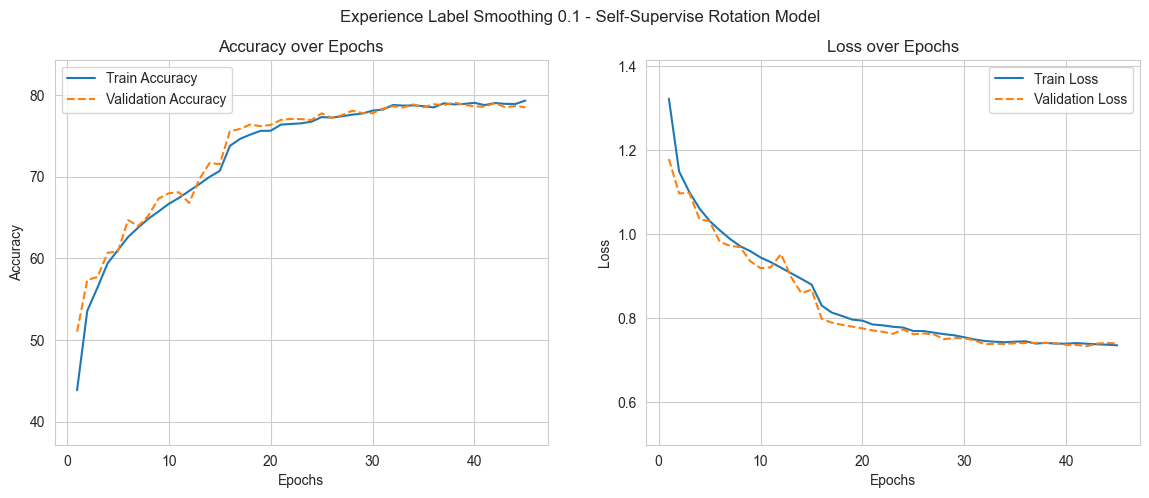

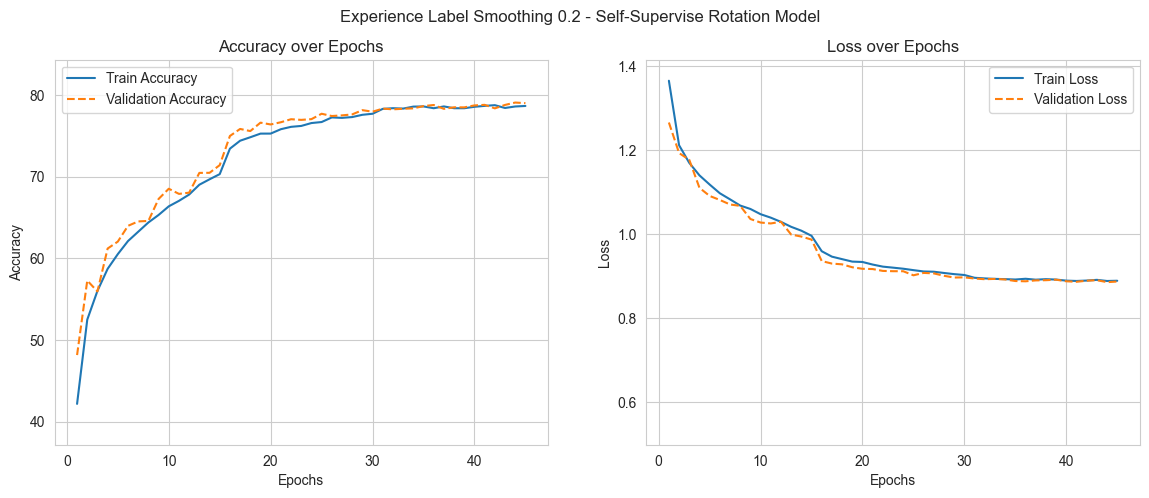

In [43]:
# Call the function with the list of reports and the specific experiment type
plot_metrics_for_experiment_type_separately(reports, 'Self-Supervise Rotation Model')

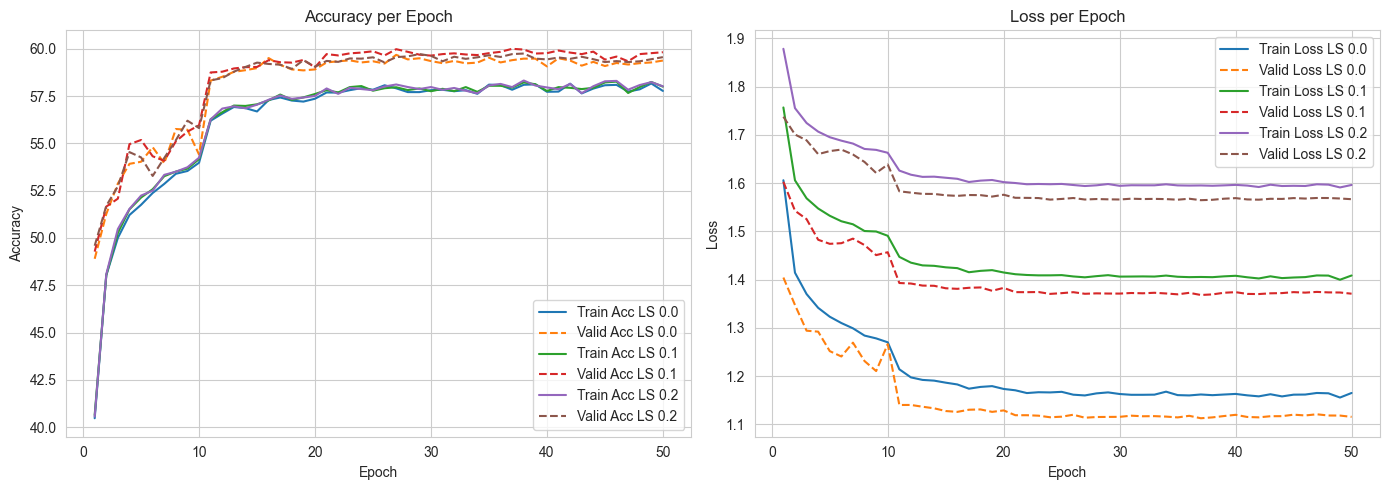

In [44]:
# Plot experiment type name and re-run the plotting function
plot_experiment_metrics(filepaths, 'Fine-tuning Pre-trained Model')

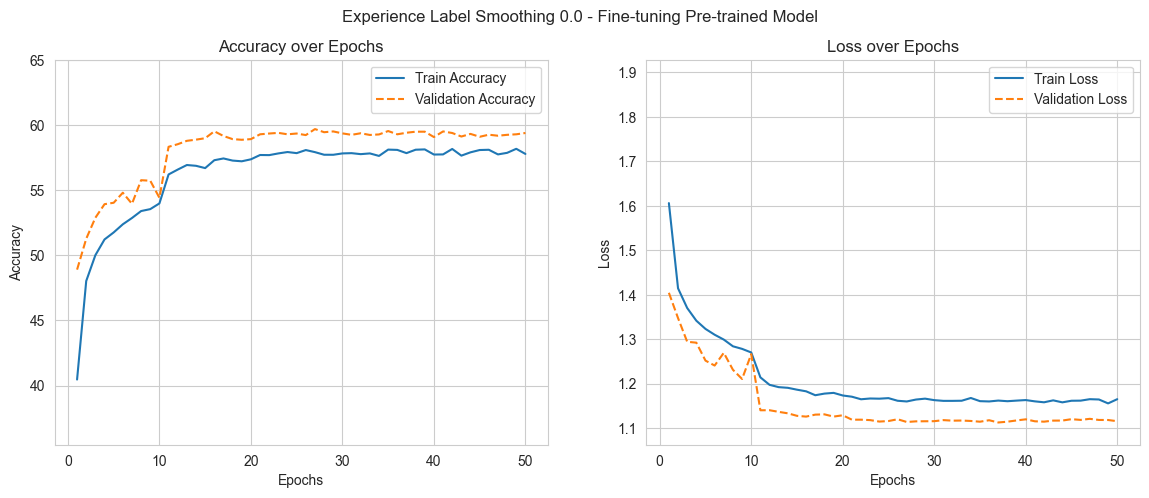

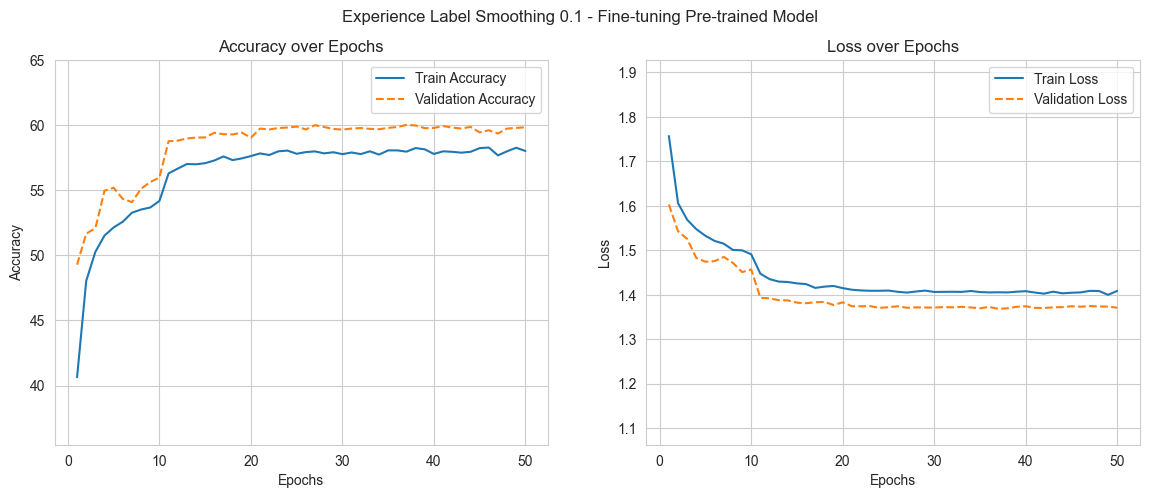

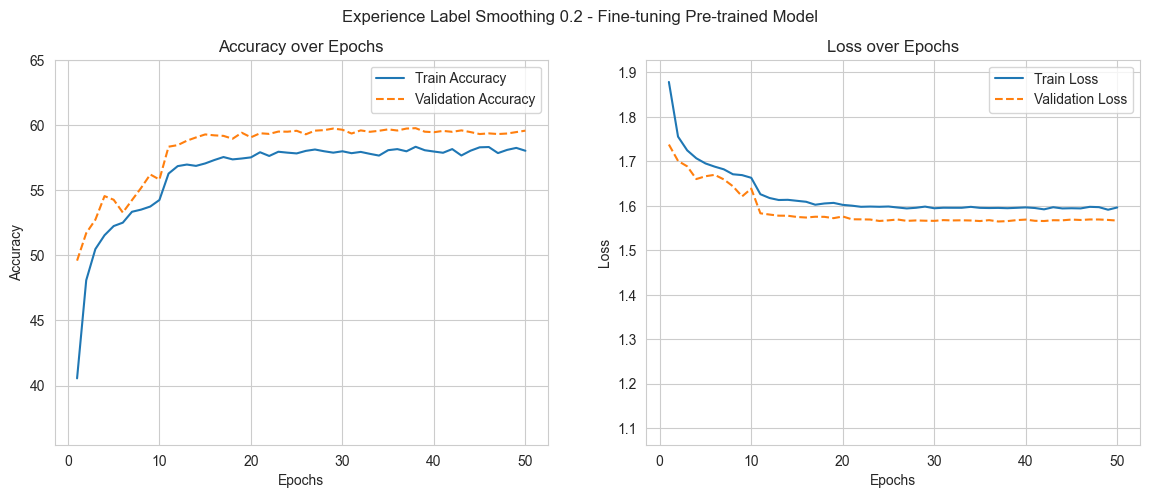

In [45]:
# Call the function with the list of reports and the specific experiment type
plot_metrics_for_experiment_type_separately(reports, 'Fine-tuning Pre-trained Model')

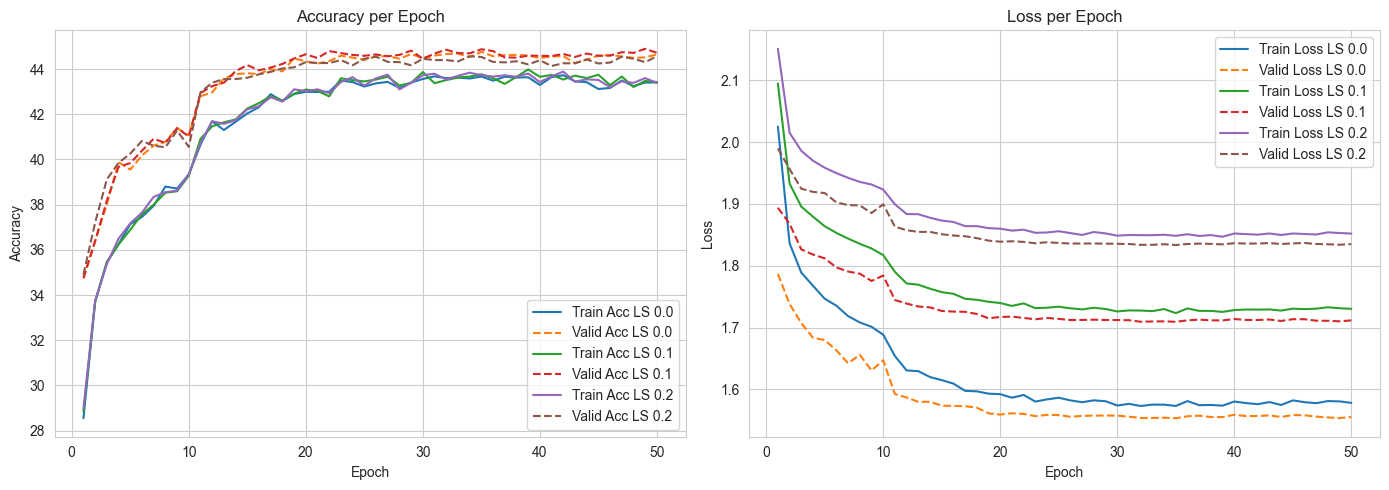

In [46]:
# Plot experiment type name and re-run the plotting function
plot_experiment_metrics(filepaths, 'Fine-tuning Randomly Initialized Model')

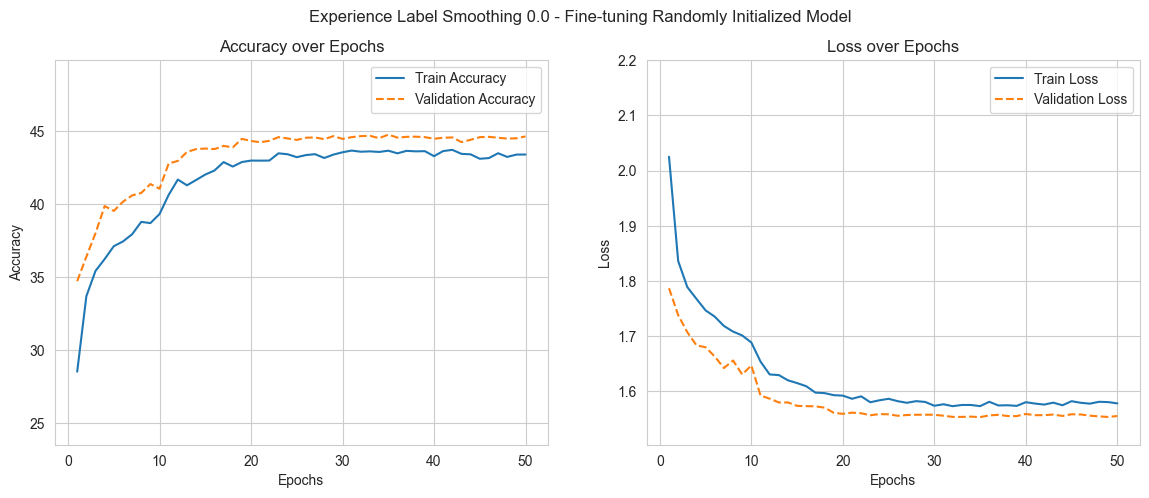

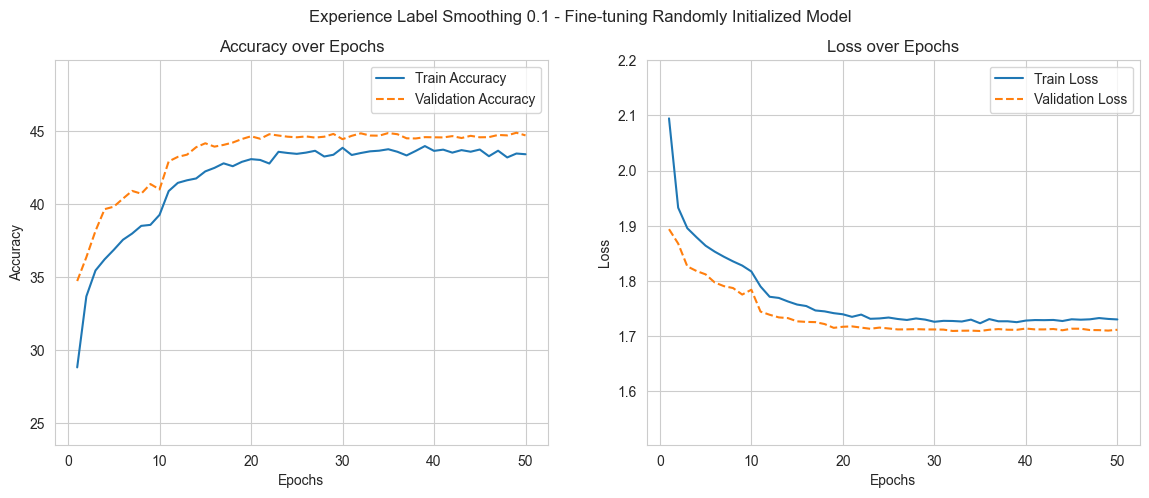

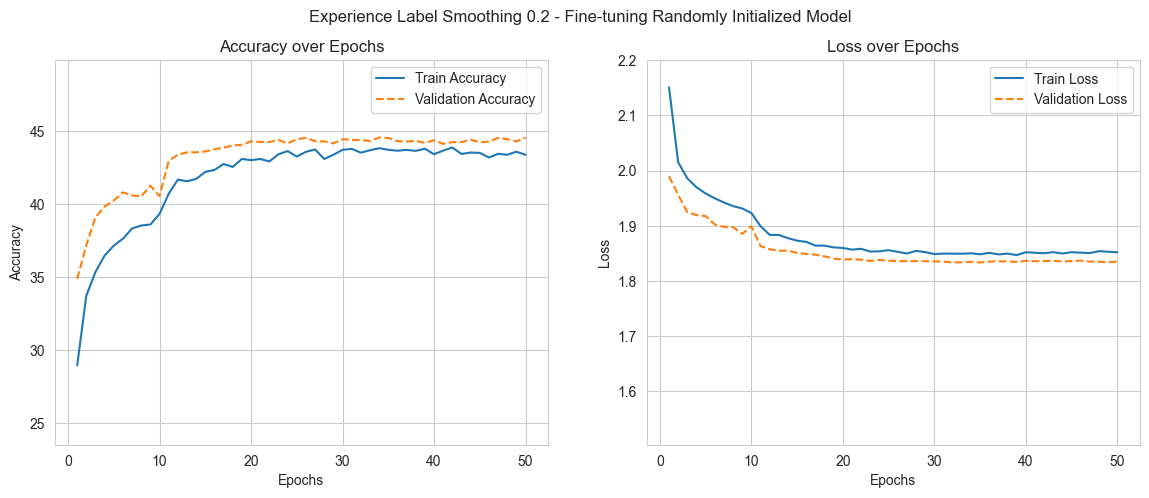

In [47]:
# Call the function with the list of reports and the specific experiment type
plot_metrics_for_experiment_type_separately(reports, 'Fine-tuning Randomly Initialized Model')

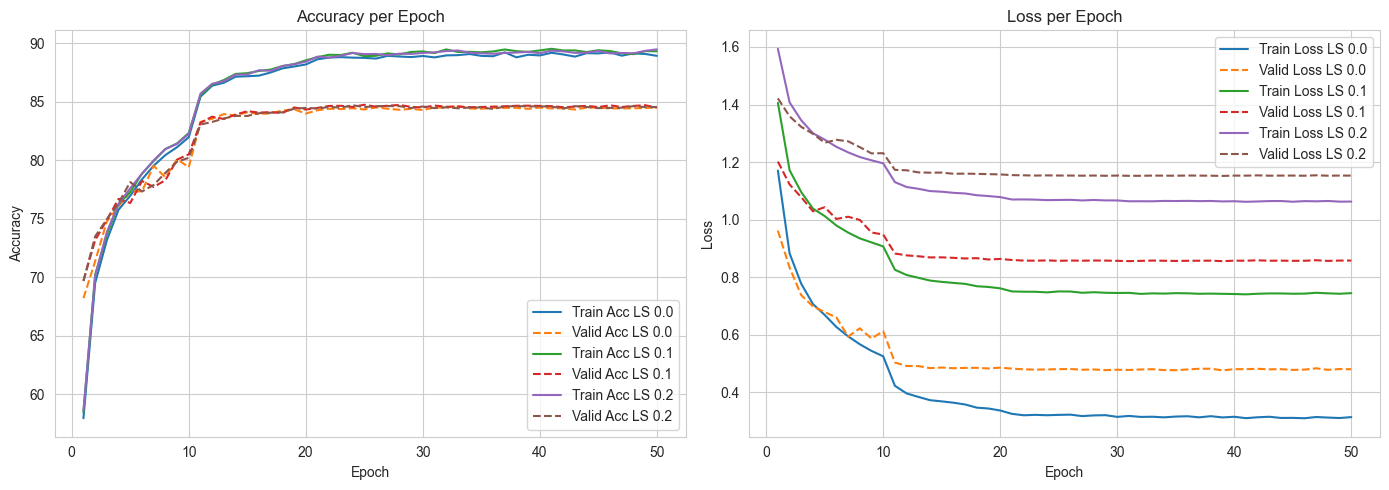

In [48]:
# Plot experiment type name and re-run the plotting function
plot_experiment_metrics(filepaths, 'Supervised Pre-trained Model')

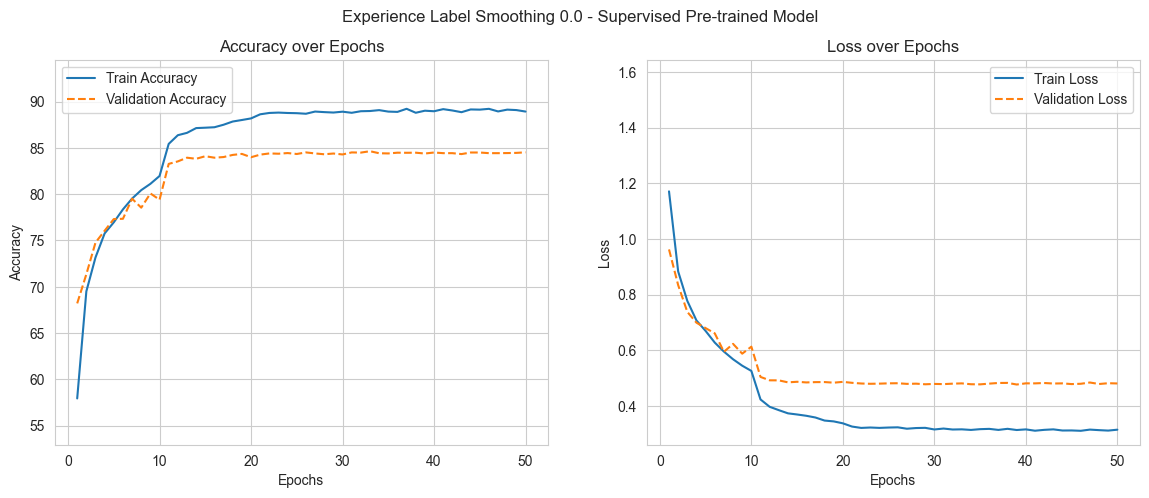

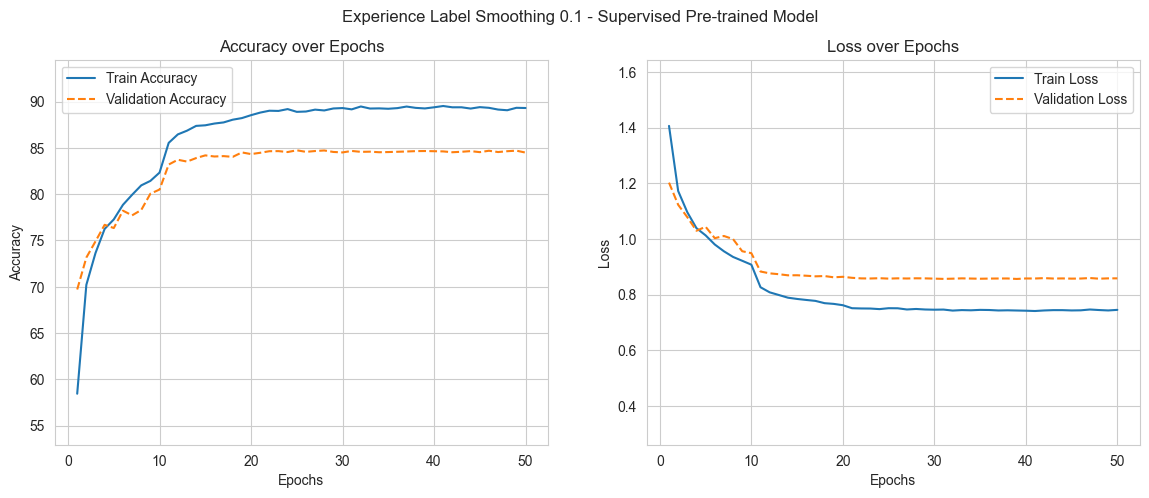

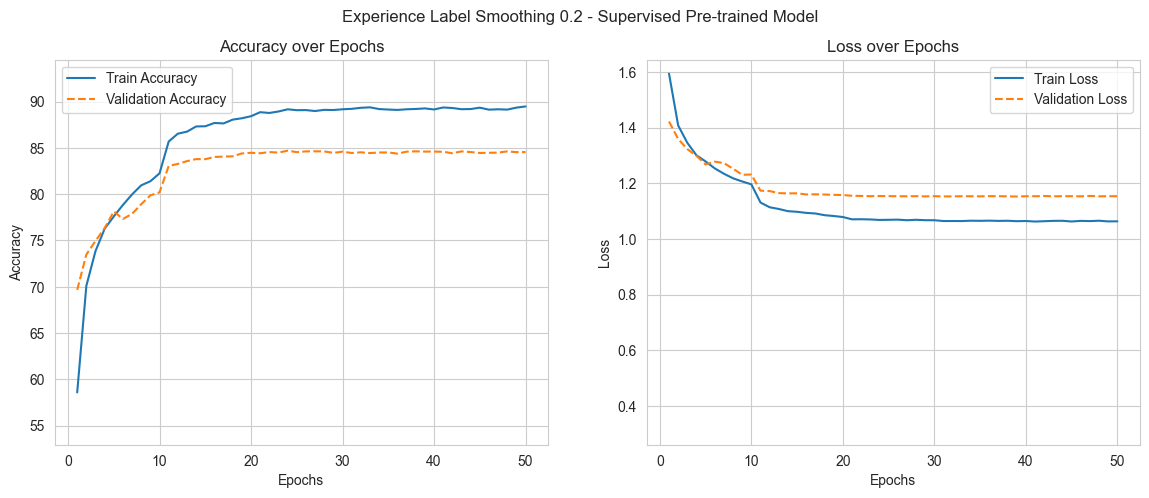

In [49]:
# Call the function with the list of reports and the specific experiment type
plot_metrics_for_experiment_type_separately(reports, 'Supervised Pre-trained Model')

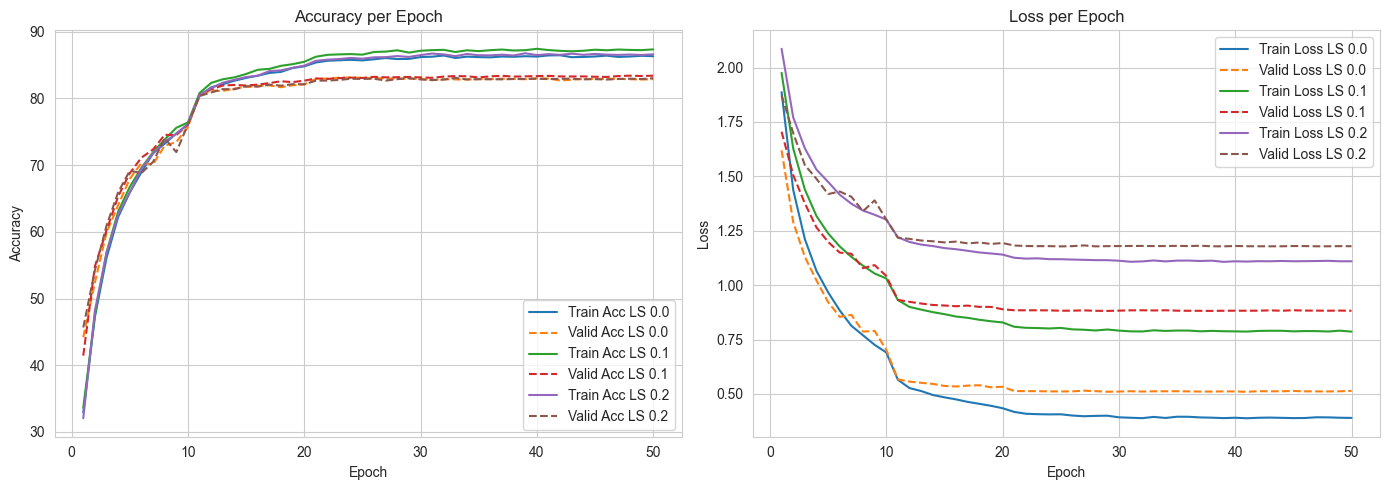

In [50]:
# Plot experiment type name and re-run the plotting function
plot_experiment_metrics(filepaths, 'Supervised Randomly Initialized Model')

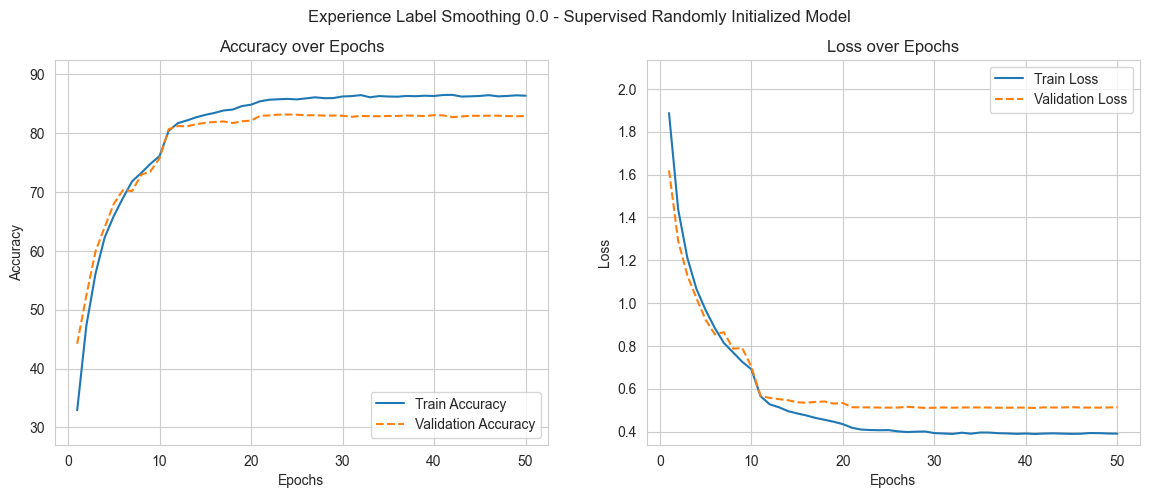

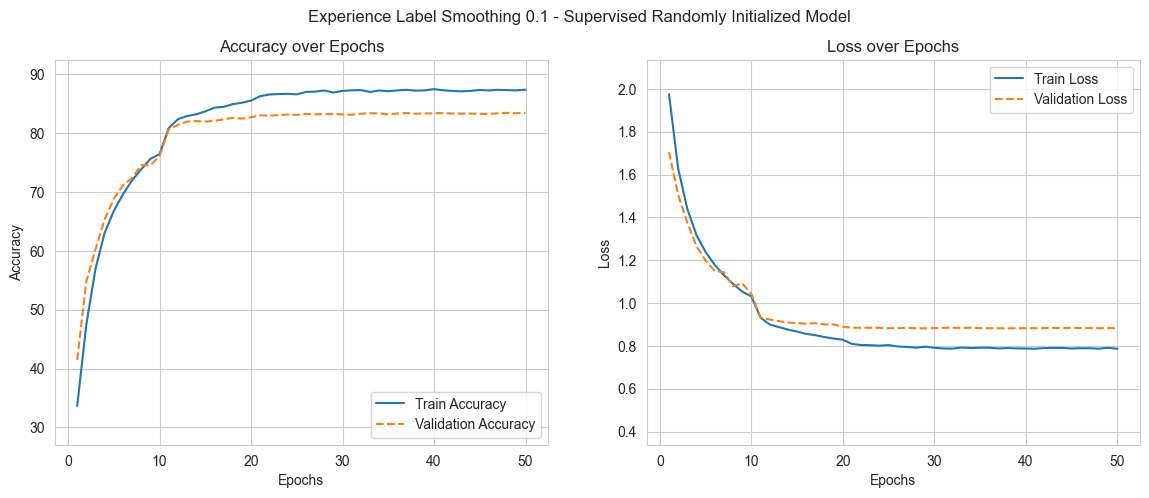

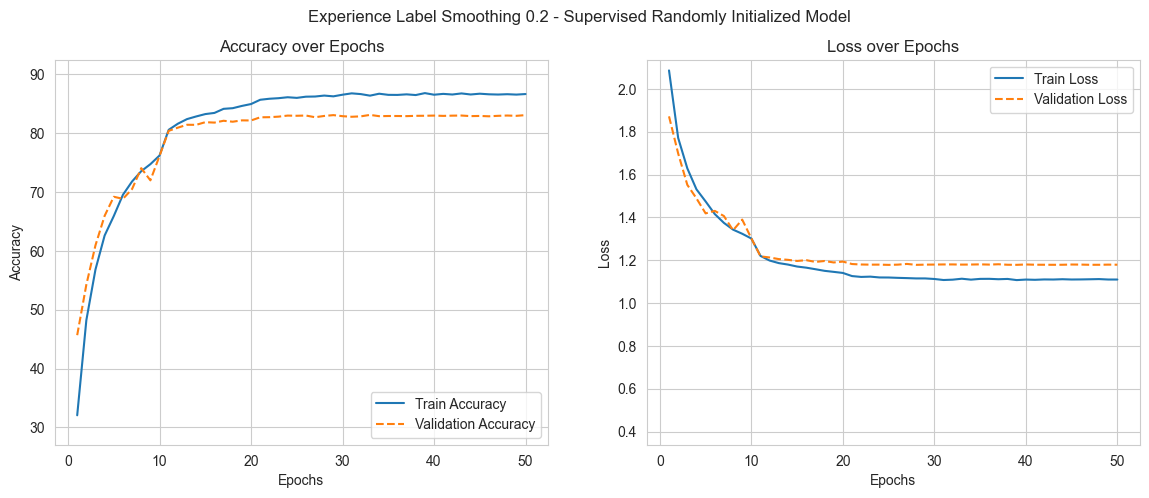

In [51]:
# Call the function with the list of reports and the specific experiment type
plot_metrics_for_experiment_type_separately(reports, 'Supervised Randomly Initialized Model')

In [52]:
import pandas as pd

# Redefine the function to extract the maximum validation accuracy
def get_max_valid_accuracy(reports):
    """
    Extracts the maximum validation accuracy for each experiment type within each experience.

    Parameters:
    - reports (list of DataFrame): A list containing the pandas DataFrames of reports.

    Returns:
    - max_accuracies (DataFrame): A DataFrame containing the maximum validation accuracies.
    """
    max_accuracies_list = []

    # Iterate through the experiences
    for idx, report in enumerate(reports):
        # Get the unique experiment types in the report
        experiment_types = report['Experiment Type'].unique()

        # Iterate through the experiment types
        for exp_type in experiment_types:
            # Filter the report for the current experiment type
            df = report[report['Experiment Type'] == exp_type]

            # Find the maximum validation accuracy for this experiment type
            max_valid_acc = df['Valid Accuracy'].max()

            # Append to the list as a dictionary
            max_accuracies_list.append({
                'Experience': f'Label Smoothing 0.{idx}',
                'Experiment Type': exp_type,
                'Max Valid Accuracy': max_valid_acc
            })

    # Convert the list of dictionaries to a DataFrame
    max_accuracies = pd.DataFrame(max_accuracies_list)
    return max_accuracies

In [53]:
# Get the max validation accuracies for the updated reports
max_valid_accuracies_df = get_max_valid_accuracy(reports)
max_valid_accuracies_df

,Experience,Experiment Type,Max Valid Accuracy
0,Label Smoothing 0.0,Self-Supervise Rotation Model,78.39
1,Label Smoothing 0.0,Fine-tuning Pre-trained Model,59.68
2,Label Smoothing 0.0,Fine-tuning Randomly Initialized Model,44.77
3,Label Smoothing 0.0,Supervised Pre-trained Model,84.64
4,Label Smoothing 0.0,Supervised Randomly Initialized Model,83.14
5,Label Smoothing 0.1,Self-Supervise Rotation Model,79.07
6,Label Smoothing 0.1,Fine-tuning Pre-trained Model,60.00
7,Label Smoothing 0.1,Fine-tuning Randomly Initialized Model,44.90
8,Label Smoothing 0.1,Supervised Pre-trained Model,84.74
9,Label Smoothing 0.1,Supervised Randomly Initialized Model,83.42


In [54]:
# Group the results by 'Experiment Type' and get the mean of 'Max Valid Accuracy'
grouped_by_experiment_type = max_valid_accuracies_df.groupby('Experience')['Max Valid Accuracy'].mean()

grouped_by_experiment_type

Experience
Label Smoothing 0.0    70.124
Label Smoothing 0.1    70.426
Label Smoothing 0.2    70.234
Name: Max Valid Accuracy, dtype: float64

In [55]:
# Transpose the results to have experiences as index and experiment types as columns
max_accuracy_df_pivot = max_valid_accuracies_df.pivot(index='Experience', columns='Experiment Type', values='Max Valid Accuracy')

max_accuracy_df_pivot

Experiment Type,Fine-tuning Pre-trained Model,Fine-tuning Randomly Initialized Model,Self-Supervise Rotation Model,Supervised Pre-trained Model,Supervised Randomly Initialized Model
Experience,,,,,
Label Smoothing 0.0,59.68,44.77,78.39,84.64,83.14
Label Smoothing 0.1,60.00,44.90,79.07,84.74,83.42
Label Smoothing 0.2,59.75,44.57,79.07,84.70,83.08


In [56]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

# Function to plot two heatmaps, one highlighting the max and the other highlighting the min validation accuracy
def plot_max_min_accuracies(max_accuracy_df_pivot: pd.DataFrame):
    # Plot for maximum values
    plt.figure(figsize=(10, 4))
    sns.heatmap(max_accuracy_df_pivot, annot=True, fmt=".2f", linewidths=.5, cmap="YlGnBu")
    for col in max_accuracy_df_pivot.columns:
        idx_max = max_accuracy_df_pivot[col].idxmax()
        plt.gca().add_patch(plt.Rectangle((max_accuracy_df_pivot.columns.get_loc(col), max_accuracy_df_pivot.index.get_loc(idx_max)),
                                          1, 1, fill=False, edgecolor='red', lw=3))
    plt.title('Maximum Validation Accuracy for each Experiment Type')
    plt.ylabel('Experience')
    plt.xlabel('Experiment Type')
    plt.xticks(rotation=45)
    plt.yticks(rotation=0)
    plt.tight_layout()
    plt.savefig(f'Plot/Valid Accuracy Table A.png')
    plt.show()

    # Plot for minimum values
    plt.figure(figsize=(10, 4))
    sns.heatmap(max_accuracy_df_pivot, annot=True, fmt=".2f", linewidths=.5, cmap="YlGnBu")
    for col in max_accuracy_df_pivot.columns:
        idx_min = max_accuracy_df_pivot[col].idxmin()
        plt.gca().add_patch(plt.Rectangle((max_accuracy_df_pivot.columns.get_loc(col), max_accuracy_df_pivot.index.get_loc(idx_min)),
                                          1, 1, fill=False, edgecolor='blue', lw=3))
    plt.title('Minimum Validation Accuracy for each Experiment Type')
    plt.ylabel('Experience')
    plt.xlabel('Experiment Type')
    plt.xticks(rotation=45)
    plt.yticks(rotation=0)
    plt.tight_layout()
    plt.savefig(f'Plot/Valid Accuracy Table B.png')
    plt.show()

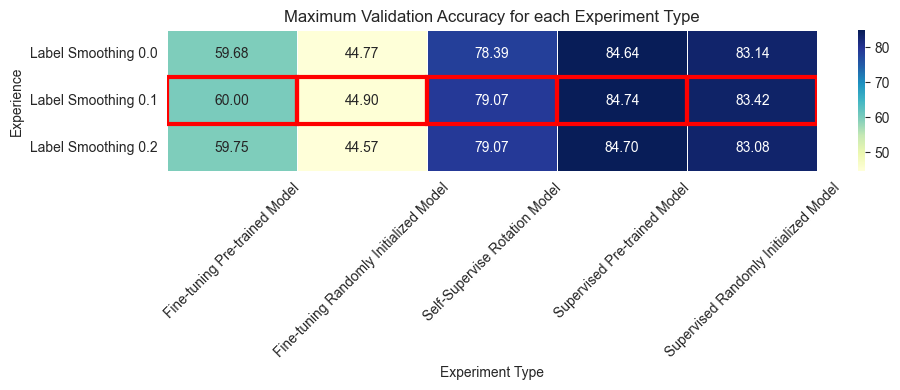

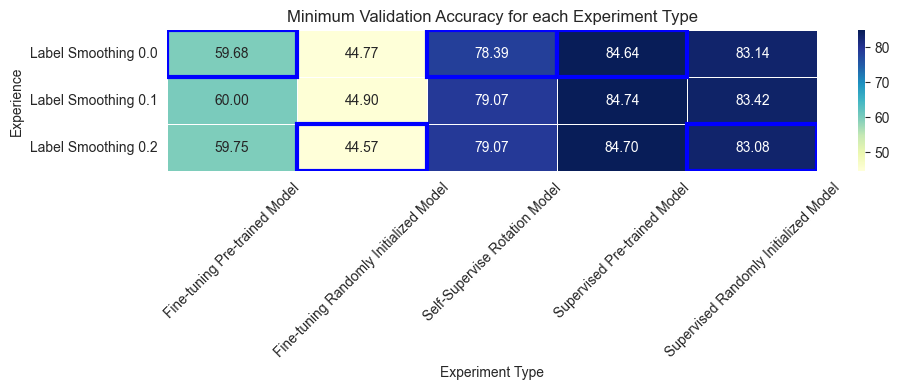

In [57]:
plot_max_min_accuracies(max_accuracy_df_pivot)